In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import warnings

warnings.filterwarnings("ignore")


In [41]:
df = pd.read_csv("Telecom_customer_churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
df.drop(['customerID'], axis = 1, inplace = True)

In [44]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [45]:
df.duplicated().sum()

22

In [46]:
df.drop_duplicates(keep = 'last', inplace = True)

In [47]:
df.duplicated().sum()

0

In [48]:
df.shape

(7021, 20)

In [49]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [50]:
# Now checking whitespaces, NA, or dashes(---)

In [51]:
df[df['TotalCharges'].isin([' ', 'NA', '-']) == True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [52]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [53]:
# Deal with Whitespaces in TotalCharges 
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [54]:
# Converting object datatype into float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [55]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace = True)

In [56]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [57]:
# Why can we fill TotalCharges from mean --> checking

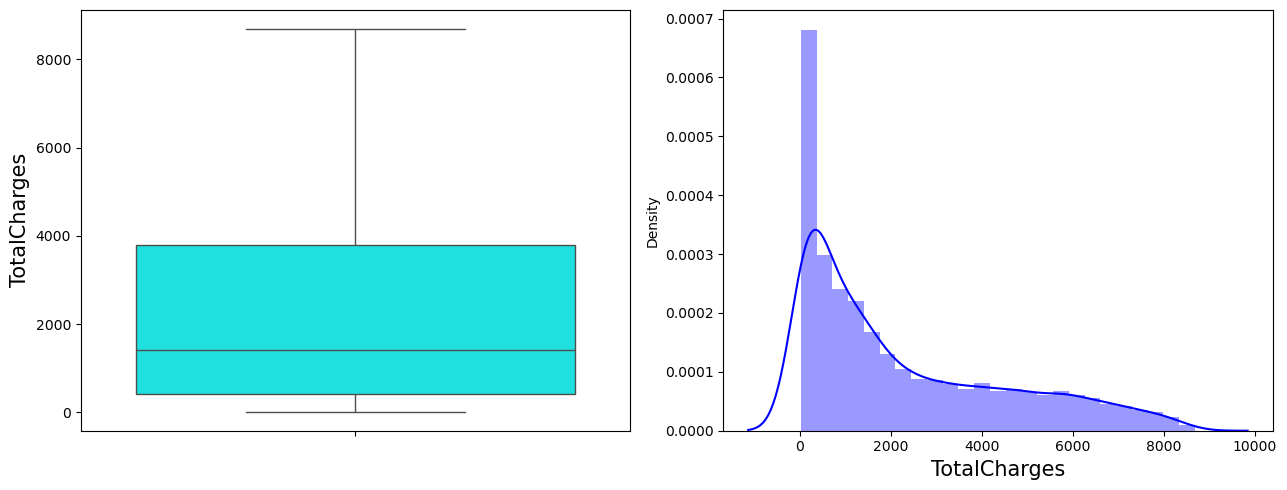

In [58]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.boxplot(y = 'TotalCharges', data = df, color = 'cyan')
plt.ylabel('TotalCharges', fontsize = 15)
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'], color = 'b')
plt.xlabel('TotalCharges', fontsize = 15)
plt.tight_layout()
plt.show()

In [59]:
# seperate numerical and categorical
Numerical = df.select_dtypes(exclude = 'object')
Categorical = df.select_dtypes(include = 'object')

In [60]:
Numerical

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [61]:
Categorical

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [62]:
for i in Categorical:
    print(df[i].value_counts())
    print('='*100)

gender
Male      3541
Female    3480
Name: count, dtype: int64
Partner
No     3619
Yes    3402
Name: count, dtype: int64
Dependents
No     4911
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6339
No      682
Name: count, dtype: int64
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype: int64
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: count, dtype: int64
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: count, dtype: int64
TechSupport
No                     3465
Yes                    2044
No internet service    1512
Name: count, dtype: int64
StreamingTV
No                     2802
Y

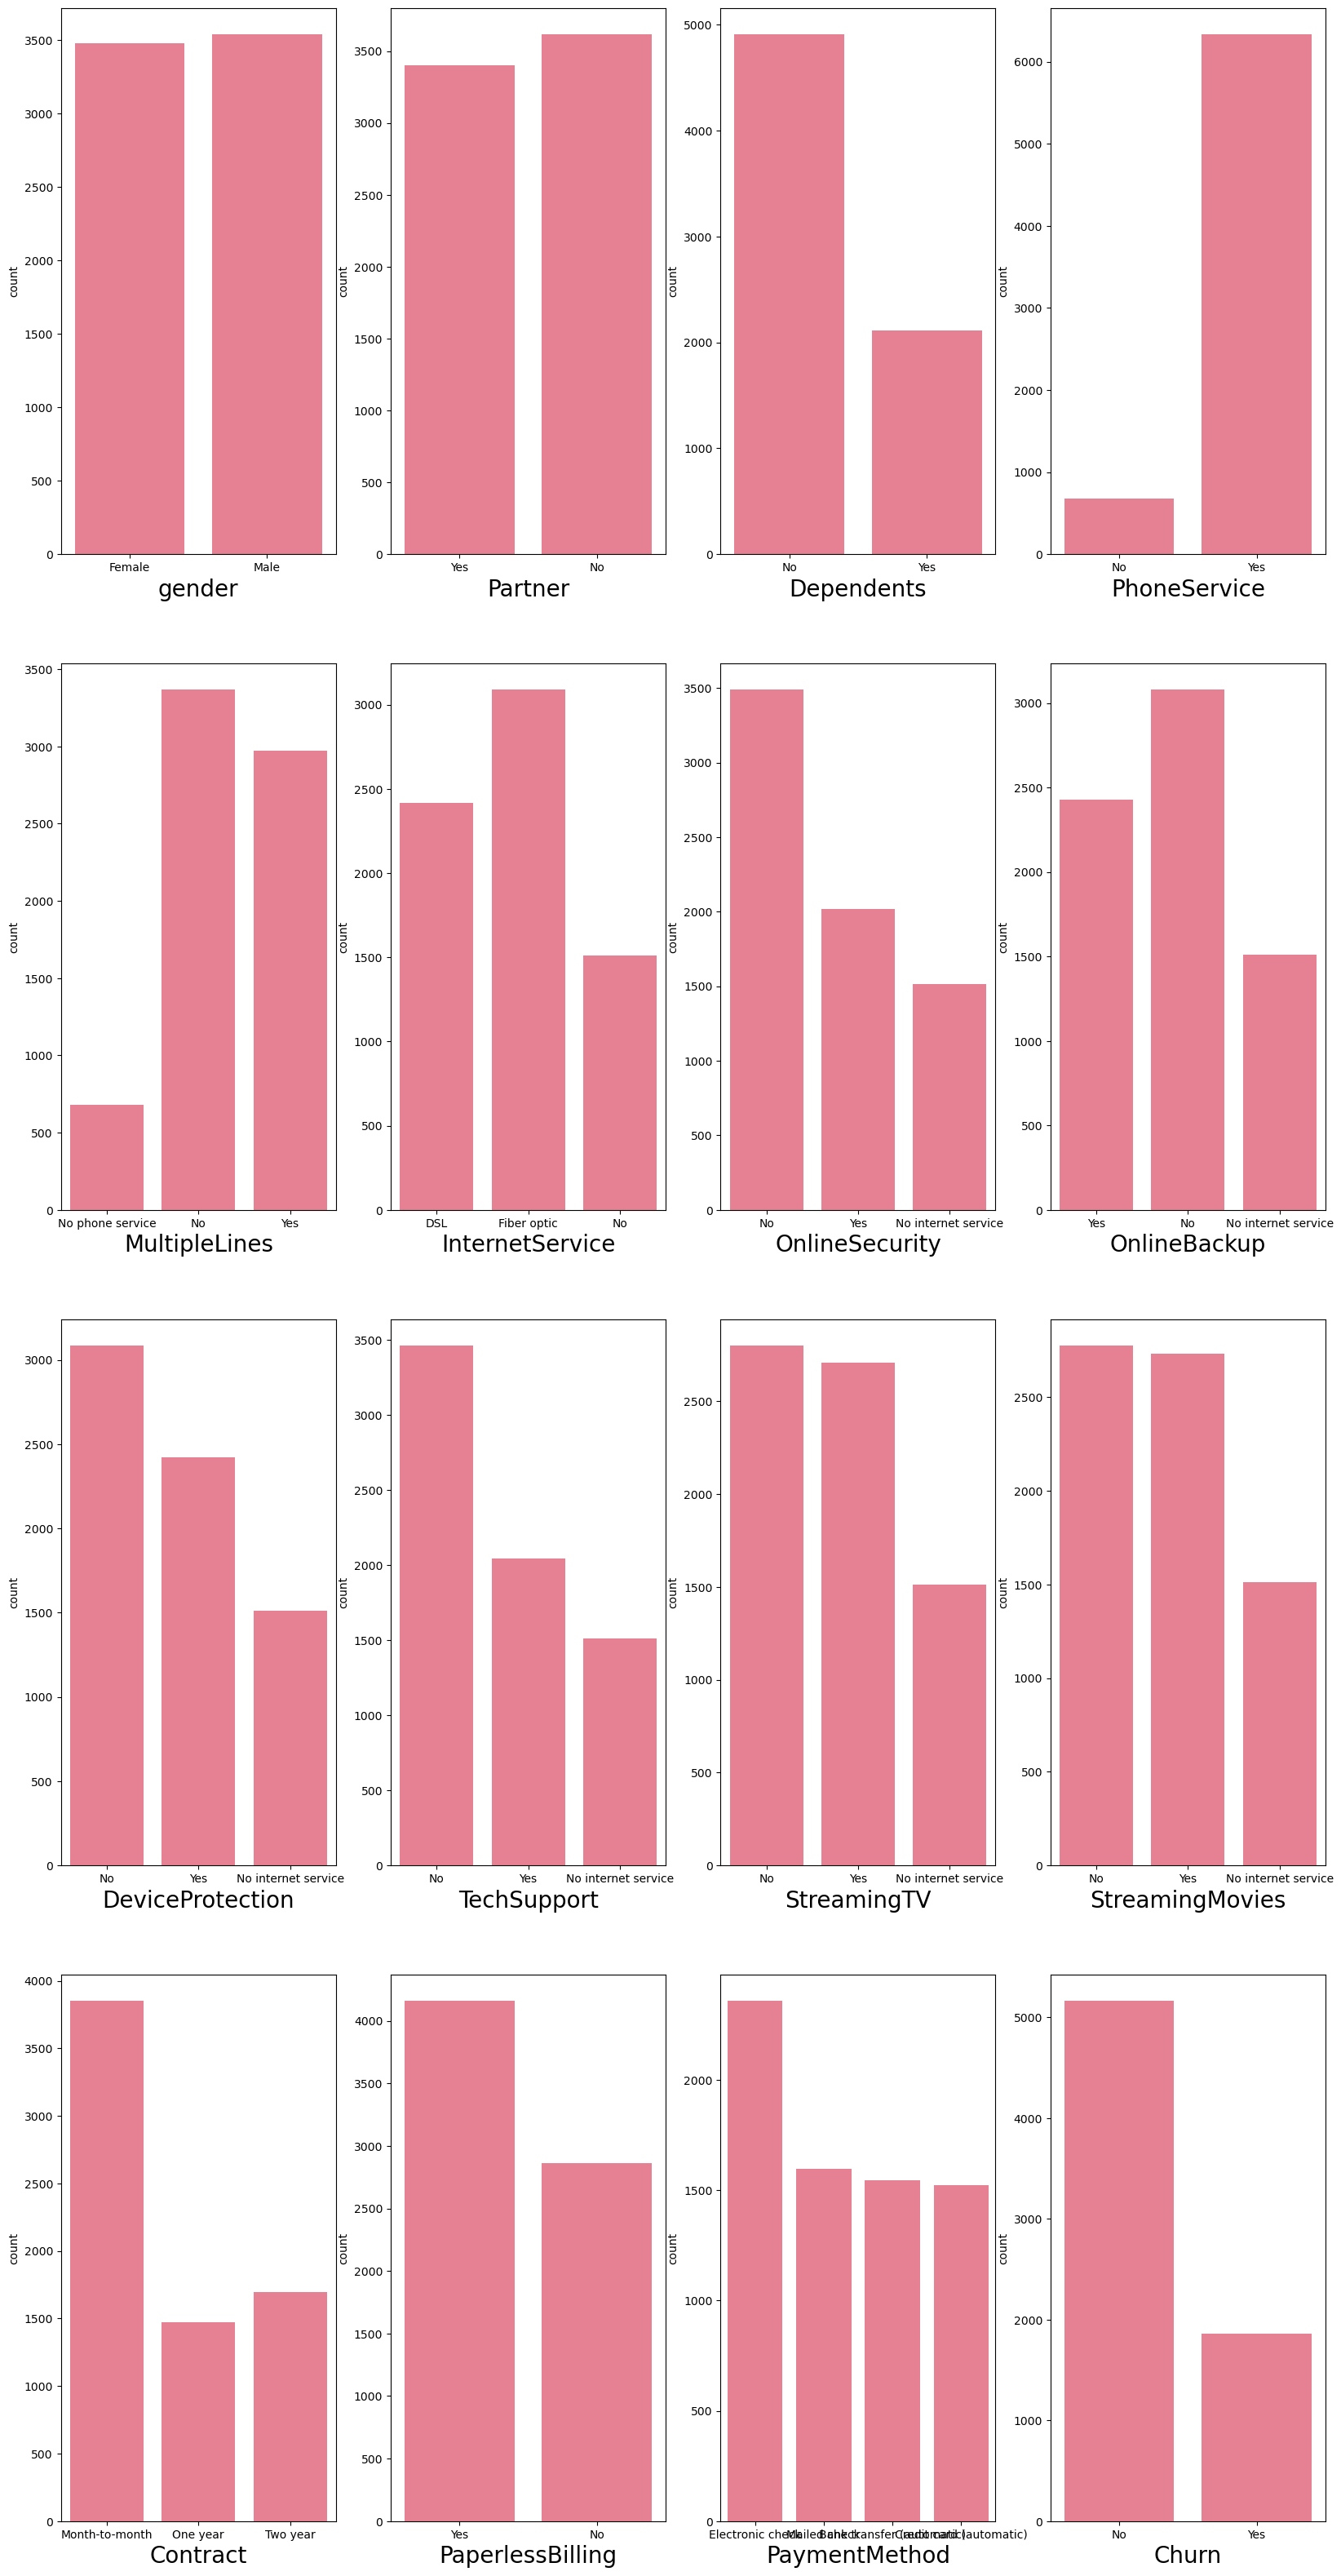

In [63]:
sns.set_palette('husl')
plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1
for i in Categorical:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x = df[i])
        plt.xlabel(i, fontsize = 20)
    plotnumber+=1
plt.show()

In [64]:
# Using Label Encoder on Categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Categorical = df.select_dtypes(include = 'object')
for i in Categorical:
    df[i] = le.fit_transform(df[i])
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1


In [65]:
df['PhoneService'].unique()

array([0, 1])

In [66]:
df.drop(['PhoneService'], axis = 1, inplace = True)

In [67]:
from scipy.stats import zscore
z = np.abs(zscore(df))
df1 = df[(z<3).all(axis = 1)]

print('Shape of the dataframe before removing outliers: ', df.shape)
print('Shape of the dataframe after removing outliers: ', df1.shape)
print('Percentage of data loss post outlier removal: ', (df.shape[0] - df1.shape[0])/df.shape[0]*100)

df = df1.copy() 

Shape of the dataframe before removing outliers:  (7021, 19)
Shape of the dataframe after removing outliers:  (7021, 19)
Percentage of data loss post outlier removal:  0.0


In [68]:
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.959073
Churn               1.068139
dtype: float64

In [69]:
df['TotalCharges'] = np.log1p(df['TotalCharges']) # 1p mean --> only positive value

In [70]:
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges       -0.744838
Churn               1.068139
dtype: float64

In [71]:
# Splitting data in target and dependent feature
X = df.drop(['Churn'], axis = 1)
Y = df['Churn']

In [72]:
Y.value_counts()

Churn
0    5164
1    1857
Name: count, dtype: int64

In [73]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [74]:
# ML model building

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score

In [79]:
maxAccu = 0
maxRS = 0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size = 0.3, random_state = i)
    lr = LogisticRegression()
    lr.fit(X_train, Y_train)
    y_pred = lr.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, "on Random_state", maxRS)

Best accuracy is:  0.8224964404366397 on Random_state 95


In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state = 95, test_size = .3)
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print(classification_report(Y_test, y_pred))
print()
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1588
           1       0.67      0.55      0.60       519

    accuracy                           0.82      2107
   macro avg       0.77      0.73      0.74      2107
weighted avg       0.81      0.82      0.82      2107


[[1448  140]
 [ 234  285]]


In [81]:
# from sklearn.Linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
maxAccu = 0
maxRS = 0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size = 0.3, random_state = i)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, Y_train)
    y_pred = dtc.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is: ', maxAccu, 'on Random_state', maxRS)

Best accuracy is:  0.751779781680114 on Random_state 158


HyperParameter Tuning

In [84]:
from sklearn.model_selection import GridSearchCV

para_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(1,50,2)],
    'min_samples_split': [i for i in range(1,20,3)],
    'min_samples_leaf': [i for i in range(1, 10)]
}

In [85]:
grid_search = GridSearchCV(dtc, para_grid, cv = 5)

In [86]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                       23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                       43, 45, 47, 49],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 4, 7, 10, 13, 16, 19]})

In [87]:
print('Best Params:', grid_search.best_params_)

Best Params: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 16}


In [88]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, min_samples_leaf = 9, min_samples_split = 16 )
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test )

In [90]:
print(classification_report(y_pred, Y_test))
print(confusion_matrix(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1696
           1       0.49      0.65      0.56       411

    accuracy                           0.80      2107
   macro avg       0.70      0.74      0.71      2107
weighted avg       0.83      0.80      0.81      2107

[[1419  277]
 [ 145  266]]


In [91]:
# Note --> for ML ---->>>> Setps must in sequence or in order.
# Prime algos --> 1. LinearRegression, 2. LogisticRegression, 3. DecisionTree, 4. RandomForest 